# **NBA PLAYER PERFORMANCE AND ANALYSIS**




## **Introduction**

The objective of this project is to conduct a comprehensive statistical analysis and create visualizations of key performance indicators (KPIs) for NBA players in the 2023-2024 regular season and playoffs. The analysis will focus on comparing the performance of players across different metrics and exploring advanced basketball statistics to identify significant trends and relationships.

## **Dataset**

**NBA Regular Season Dataset**

Rows: 572,
Columns: 30

**Description**: This dataset records player statistics during the NBA regular season. It includes similar metrics as the playoffs dataset but represents the entire season performance.
Sample Columns: Player, Pos, Age, Tm, G, FG%, 3P%, PTS

**NBA Playoffs Dataset**

Rows: 214,
Columns: 30

**Description**: This dataset contains detailed performance statistics of players during NBA playoffs. Key attributes include player details (e.g., name, position, team), gameplay stats (e.g., games played, minutes, points), and efficiency metrics (e.g., field goal percentage, assists).
Sample Columns: player, pos, age, tm, g, fg%, 3p%, pts

## **Data Cleaning and Preprocessing**

To ensure the integrity and accuracy of our analysis, we meticulously cleaned and preprocessed the NBA datasets for both the regular season and playoffs.

*  **Handled Duplicate Player Entries:** For players who played for multiple teams, their statistics were aggregated under the "TOT" (total) row, updated with their most recent team and most-played position.
*   **Removed Null Values:** Eliminated any missing data to ensure consistency and avoid computational errors during analysis.
*   **Standardized Column Names:** Cleaned and reformatted column names by removing spaces and ensuring uniformity for ease of access.
*   **Sorted and Re-indexed Data:** Both datasets were sorted by team name, and indices were reset for better readability and organization.





In [ ]:
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import seaborn as sns # Import the seaborn library for plotting
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

#Cleaning the Regular Season Dataset
# Load the datasets with 'ISO-8859-1' encoding and semicolon delimiter
regular_season_df = pd.read_csv('Regular 2023-2024 NBA Player Stats.csv', encoding='ISO-8859-1', delimiter=';')

# Function to clean regular season data
def clean_regular_season_data(df):
    cleaned_rows = []

    # Step 1: Group by 'Player' to handle each player individually
    for player, group in df.groupby('Player'):

        # If player has only one entry, keep it as is
        if len(group) == 1:
            cleaned_rows.append(group.iloc[0])
            continue

        # Identify 'TOT' row and the latest team (last row in sorted order by team appearance)
        tot_row = group[group['Tm'] == 'TOT'].copy()
        latest_team_row = group.iloc[-1]  # last row, representing the most recent team

        # Determine the most-played position by counting occurrences
        most_played_pos = group['Pos'].mode()[0]  # Most frequent position

        # Update the 'TOT' row with the latest team and most-played position
        tot_row.iloc[0, df.columns.get_loc('Tm')] = latest_team_row['Tm']
        tot_row.iloc[0, df.columns.get_loc('Pos')] = most_played_pos

        # Append the cleaned 'TOT' row (with aggregate stats, latest team, and most-played position)
        cleaned_rows.append(tot_row.iloc[0])

    # Convert the list of cleaned rows back to a DataFrame
    cleaned_df = pd.DataFrame(cleaned_rows)

    # Sort the cleaned DataFrame by team name in ascending order
    cleaned_df = cleaned_df.sort_values(by='Tm').reset_index(drop=True)

    # Set the "Rk" column to a range starting from 1
    cleaned_df['Rk'] = range(1, len(cleaned_df) + 1)

    return cleaned_df

# Clean the regular season data
cleaned_regular_season_df = clean_regular_season_data(regular_season_df)

# Show cleaned data
print(cleaned_regular_season_df.head())



   Rk           Player Pos  Age   Tm   G  GS    MP   FG  FGA  ...    FT%  ORB  \
0   1      Kobe Bufkin  SG   20  ATL  17   0  11.5  2.0  5.4  ...  0.500  0.4   
1   2   Bruno Fernando   C   25  ATL  45   2  15.2  2.4  4.2  ...  0.667  1.3   
2   3   Mouhamed Gueye  PF   21  ATL   6   0  12.2  1.3  3.8  ...  0.833  1.7   
3   4    Dylan Windler  SF   27  ATL  17   0   6.4  0.9  1.8  ...  0.000  0.2   
4   5  Wesley Matthews  SG   37  ATL  36   3  11.5  0.9  2.7  ...  0.750  0.3   

   DRB  TRB  AST  STL  BLK  TOV   PF  PTS  
0  1.6  1.9  1.6  0.4  0.3  0.6  1.2  4.8  
1  3.0  4.3  1.0  0.6  0.6  1.0  2.4  6.3  
2  2.0  3.7  0.7  0.8  0.7  0.2  2.2  4.0  
3  0.8  0.9  0.6  0.1  0.0  0.1  0.4  2.5  
4  1.2  1.5  0.6  0.4  0.3  0.2  1.2  3.1  

[5 rows x 30 columns]


In [ ]:
# Cleaning the Playoffs Dataset
# Load the playoffs dataset (adjust file path as necessary)
playoffs_file = 'Playoffs 2023-2024 NBA Player Stats.csv'
playoffs_df = pd.read_csv(playoffs_file, delimiter=';')

# Clean column names
playoffs_df.columns = playoffs_df.columns.str.strip().str.replace(' ', '_')

# Remove null values
playoffs_df = playoffs_df.dropna()

# Sort players by team name (column 'tm')
playoffs_df = playoffs_df.sort_values(by='Tm')

# Reset index for better readability
playoffs_df = playoffs_df.reset_index(drop=True)

playoffs_df['rk'] = range(1, len(playoffs_df) + 1)

# Display the first few rows of the cleaned data
print(playoffs_df.head())



    Rk              Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
0   79        Jrue Holiday  PG   33  BOS  19  19  37.9  5.1  10.2  ...  1.9   
1  165       Neemias Queta   C   24  BOS   3   0   4.3  0.7   1.0  ...  0.3   
2  180      Jaden Springer  PG   21  BOS   4   0   5.5  0.5   0.8  ...  0.0   
3  163    Payton Pritchard  PG   26  BOS  19   0  18.7  2.3   5.5  ...  0.7   
4  159  Kristaps Porzi??is   C   28  BOS   7   4  23.6  4.0   8.6  ...  0.6   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS  rk  
0  4.2  6.1  4.4  1.1  0.6  1.5  2.1  13.2   1  
1  0.7  1.0  0.0  0.0  0.3  0.0  0.0   1.3   2  
2  0.8  0.8  0.3  0.0  0.3  0.5  0.3   1.0   3  
3  1.2  1.9  2.1  0.2  0.0  0.7  1.2   6.4   4  
4  3.9  4.4  1.1  0.7  1.6  0.7  2.1  12.3   5  

[5 rows x 31 columns]


In [ ]:
# Function to replace '?' in player names with 'ć'
def clean_player_names(df):
    # Replace '?' with 'ć' in the 'Player' column
    df['Player'] = df['Player'].str.replace('?', 'ć', regex=False)
    return df

# Clean player names in both datasets
cleaned_regular_season_df = clean_player_names(cleaned_regular_season_df)
playoffs_df = clean_player_names(playoffs_df)

# Save the updated datasets
cleaned_regular_season_df.to_csv('NBA_RegularSeason_Dataset_CLEANED.csv', index=False)
playoffs_df.to_csv('NBA_Playoffs_Dataset_CLEANED.csv', index=False)

# Display a message to confirm
print("Player names cleaned and saved to updated cleaned datasets.")




Player names cleaned and saved to updated cleaned datasets.


In [ ]:
print(cleaned_regular_season_df.columns)


Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [ ]:
print(playoffs_df.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'rk'],
      dtype='object')


## **Exploratory Data Analysis**

### Section 1: FIELD GOAL PERCENTAGE (FG%) Analysis

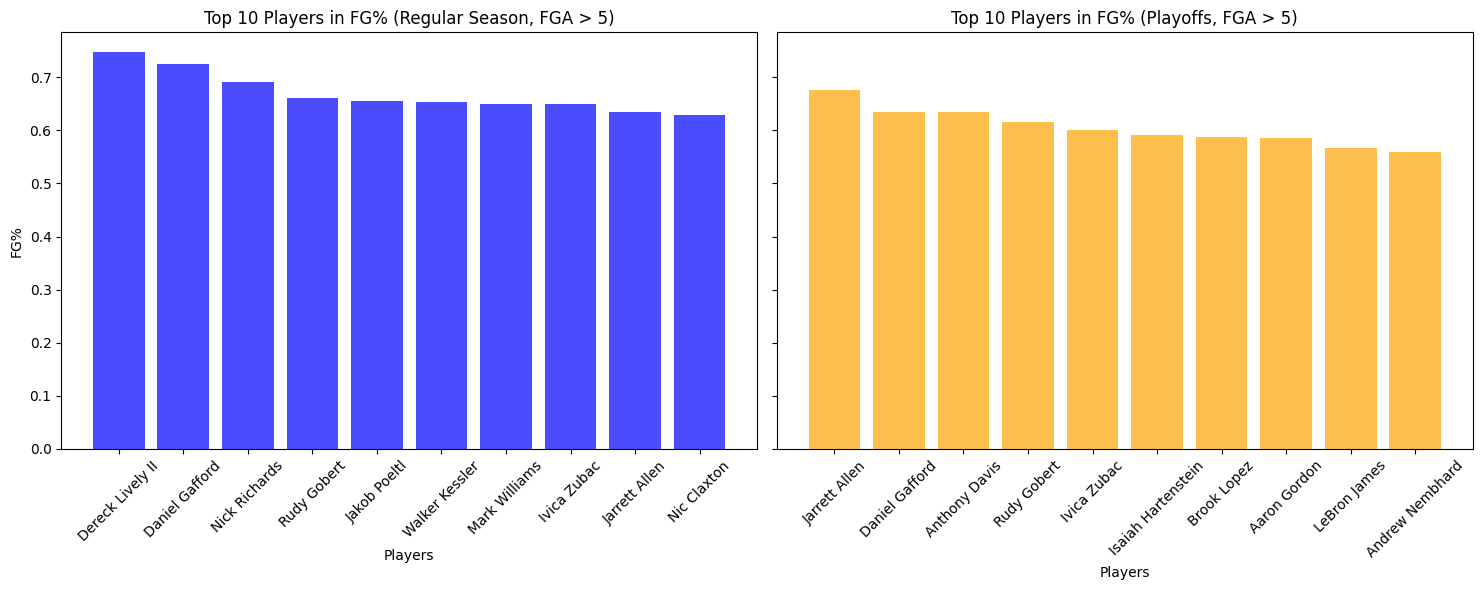

In [ ]:
# Step 1: Filter players with more than 5 field goal attempts (FGA) for both datasets
def filter_players_by_fga(df, min_attempts=5):
    """Filter players based on minimum field goal attempts."""
    return df[df["FGA"] > min_attempts]

filtered_regular_season_fg_df = filter_players_by_fga(cleaned_regular_season_df)
filtered_playoffs_fg_df = filter_players_by_fga(playoffs_df)

# Step 2: Get top 10 players by `FG%` (already provided in the dataset)
def get_top_10(df, column):
    """Get the top 10 rows based on the specified column."""
    return df.nlargest(10, column)

top_10_fg_regular = get_top_10(filtered_regular_season_fg_df, "FG%")
top_10_fg_playoffs = get_top_10(filtered_playoffs_fg_df, "FG%")

# Step 3: Extract data for plotting
regular_fg_players = top_10_fg_regular["Player"]
regular_fg = top_10_fg_regular["FG%"]

playoff_fg_players = top_10_fg_playoffs["Player"]
playoff_fg = top_10_fg_playoffs["FG%"]

# Step 4: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Regular season bar graph
axes[0].bar(regular_fg_players, regular_fg, color="blue", alpha=0.7)
axes[0].set_title("Top 10 Players in FG% (Regular Season, FGA > 5)")
axes[0].set_xlabel("Players")
axes[0].set_ylabel("FG%")
axes[0].tick_params(axis='x', rotation=45)

# Playoff bar graph
axes[1].bar(playoff_fg_players, playoff_fg, color="orange", alpha=0.7)
axes[1].set_title("Top 10 Players in FG% (Playoffs, FGA > 5)")
axes[1].set_xlabel("Players")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()




####**In both the regular season and playoffs, the top players in field goal percentage (FG%) predominantly consist of centers.**
####**Centers have a natural advantage in FG% due to their positioning, often converting on layups, dunks, and short-range shots that are much easier compared to long-range attempts like three-pointers. This proximity to the basket results in higher conversion rates, as it eliminates the challenges of shooting from distance, which tends to lower overall shooting percentages.**

### Section 2: 3-POINT PERCENTAGE (3P%) Analysis

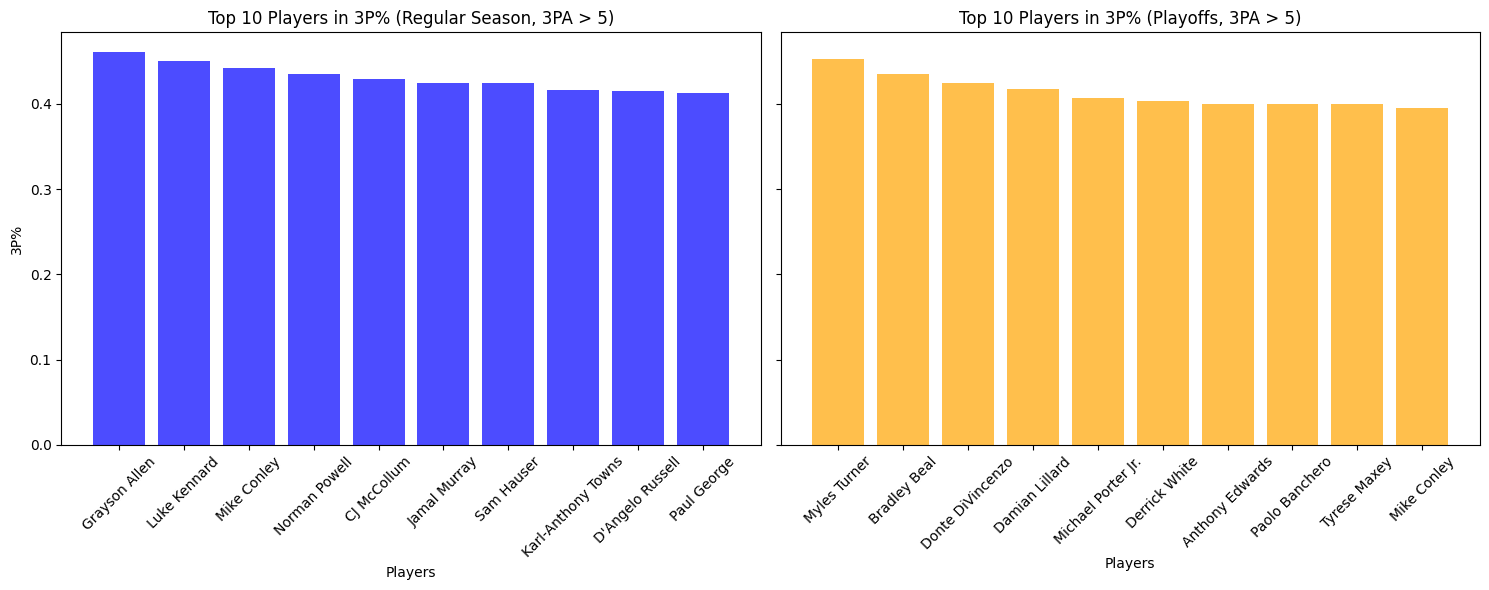

In [ ]:
# Step 1: Filter players with more than 4 three-point attempts (3PA) for both datasets
def filter_players_by_3pa(df, min_attempts=5):
    """Filter players based on minimum three-point attempts."""
    return df[df["3PA"] > min_attempts]

filtered_regular_season_df = filter_players_by_3pa(cleaned_regular_season_df)
filtered_playoffs_df = filter_players_by_3pa(playoffs_df)

# Step 2: Get top 10 players by `3P%` (already provided in the dataset)
def get_top_10(df, column):
    """Get the top 10 rows based on the specified column."""
    return df.nlargest(10, column)

top_10_3p_regular = get_top_10(filtered_regular_season_df, "3P%")
top_10_3p_playoffs = get_top_10(filtered_playoffs_df, "3P%")

# Step 3: Extract data for plotting
regular_players = top_10_3p_regular["Player"]
regular_3p = top_10_3p_regular["3P%"]

playoff_players = top_10_3p_playoffs["Player"]
playoff_3p = top_10_3p_playoffs["3P%"]

# Step 4: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Regular season bar graph
axes[0].bar(regular_players, regular_3p, color="blue", alpha=0.7)
axes[0].set_title("Top 10 Players in 3P% (Regular Season, 3PA > 5)")
axes[0].set_xlabel("Players")
axes[0].set_ylabel("3P%")
axes[0].tick_params(axis='x', rotation=45)

# Playoff bar graph
axes[1].bar(playoff_players, playoff_3p, color="orange", alpha=0.7)
axes[1].set_title("Top 10 Players in 3P% (Playoffs, 3PA > 5)")
axes[1].set_xlabel("Players")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### **The comparison between 3P% in the regular season and playoffs reveals significant differences in player performance. The regular season, with its 82 games, allows players more opportunities to showcase consistent shooting, as seen with players like Grayson Allen and Luke Kennard. However, the playoffs are much shorter, with teams playing a minimum of 4 games and a maximum of 28 games if they reach the finals. This condensed format creates higher pressure, leading to more variability in player performance.**

####**The drastic shift in the top 10 players from the regular season to the playoffs highlights how regular-season success doesn’t always translate to playoff success. This list consists predominantly of Shooting Guards.**



### Section 3: FREE THROW PERCENTAGE (FT%) Analysis

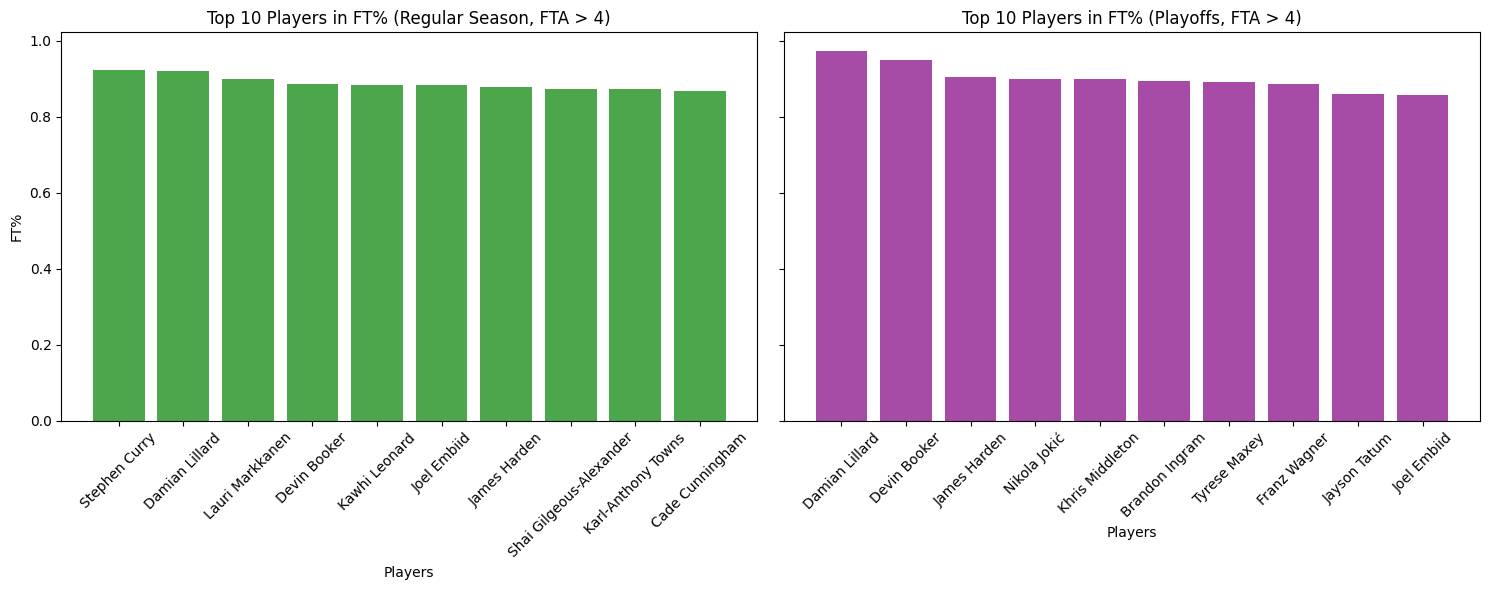

In [ ]:
# Step 1: Filter players with more than 4 free throw attempts (FTA) for both datasets
def filter_players_by_fta(df, min_attempts= 4):
    """Filter players based on minimum free throw attempts."""
    return df[df["FTA"] > min_attempts]

filtered_regular_season_df_ft = filter_players_by_fta(cleaned_regular_season_df)
filtered_playoffs_df_ft = filter_players_by_fta(playoffs_df)

# Step 2: Get top 10 players by `FT%` (already provided in the dataset)
def get_top_10(df, column):
    """Get the top 10 rows based on the specified column."""
    return df.nlargest(10, column)

top_10_ft_regular = get_top_10(filtered_regular_season_df_ft, "FT%")
top_10_ft_playoffs = get_top_10(filtered_playoffs_df_ft, "FT%")

# Step 3: Extract data for plotting
regular_players_ft = top_10_ft_regular["Player"]
regular_ft = top_10_ft_regular["FT%"]

playoff_players_ft = top_10_ft_playoffs["Player"]
playoff_ft = top_10_ft_playoffs["FT%"]

# Step 4: Create subplots for side-by-side bar graphs
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Regular season bar graph
axes[0].bar(regular_players_ft, regular_ft, color="green", alpha=0.7)
axes[0].set_title("Top 10 Players in FT% (Regular Season, FTA > 4)")
axes[0].set_xlabel("Players")
axes[0].set_ylabel("FT%")
axes[0].tick_params(axis='x', rotation=45)

# Playoff bar graph
axes[1].bar(playoff_players_ft, playoff_ft, color="purple", alpha=0.7)
axes[1].set_title("Top 10 Players in FT% (Playoffs, FTA > 4)")
axes[1].set_xlabel("Players")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


####**In both the regular season and playoffs, free-throw shooting (FT%) remains remarkably consistent among the top players, as shown by the relatively uniform high percentages in both sets.**

####**The smaller sample size in the playoffs means a player's performance can more dramatically influence their rank, as they face fewer opportunities to maintain a high level of consistency compared to the longer regular season.**








### Section 4: POINTS PER GAME (PPG)

In [ ]:
# Function to get top 10 players based on a specific statistic with position
def get_top_10(df, stat, season_type):
    top_10 = df[['Player', 'Tm', 'Pos', stat]].sort_values(by=stat, ascending=False).head(10)
    print(f"\nTop 10 Players in {stat} ({season_type}):")
    print(top_10)
    return top_10

def plot_leaderboard(df, stat, season):
    top_10 = df[['Player', 'Tm', stat]].sort_values(by=stat, ascending=False).head(10)
    sns.barplot(x=stat, y='Player', data=top_10, hue='Player', palette='viridis')
    plt.title(f'Top 10 Players in {stat} ({season})')
    plt.xlabel(stat)
    plt.ylabel('Player')
    plt.show()



Top 10 Players in PPG (Regular Season):
                      Player   Tm Pos   PPG
421              Joel Embiid  PHI   C  34.7
122              Luka Donćić  DAL  PG  33.9
320    Giannis Antetokounmpo  MIL  PF  30.4
386  Shai Gilgeous-Alexander  OKC  PG  30.1
371            Jalen Brunson  NYK  PG  28.7
448             Devin Booker  PHO  PG  27.1
443             Kevin Durant  PHO  PF  27.1
31              Jayson Tatum  BOS  PF  26.9
94          Donovan Mitchell  CLE  SG  26.6
485             De'Aaron Fox  SAC  PG  26.6

Top 10 Players in PPG (Playoffs):
                      Player   Tm Pos   PPG
195              Joel Embiid  PHI   C  33.0
148            Jalen Brunson  NYK  PG  32.4
113           Damian Lillard  MIL  PG  31.3
164  Shai Gilgeous-Alexander  OKC  PG  30.2
197             Tyrese Maxey  PHI  PG  29.8
15          Donovan Mitchell  CLE  SG  29.6
38               Luka Donćić  DAL  PG  28.9
53              Nikola Jokić  DEN   C  28.7
92              LeBron James  LAL  PF  27.8


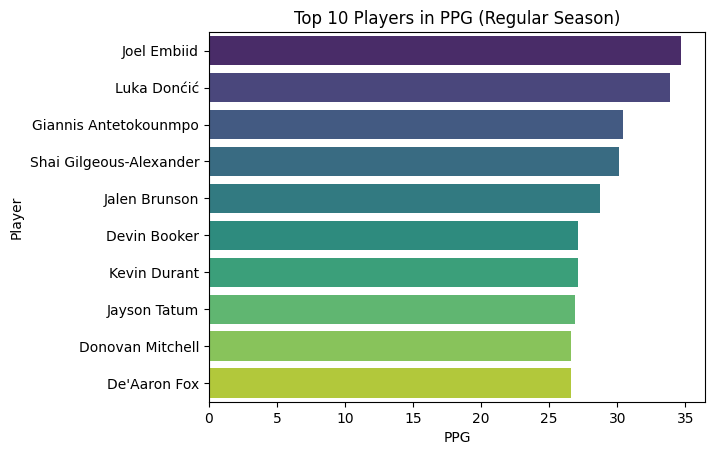

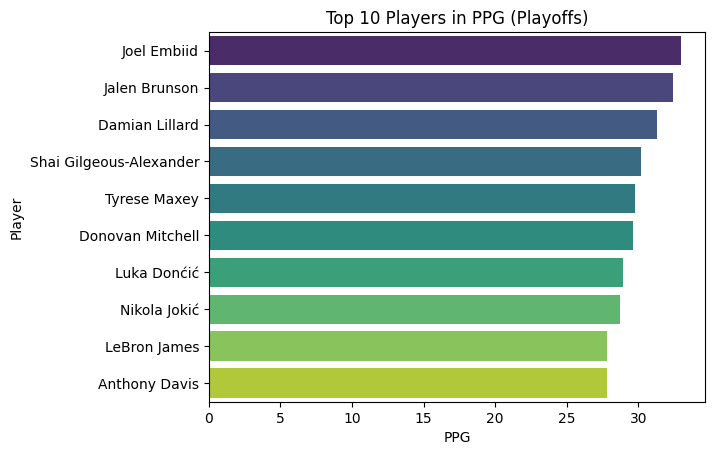

In [ ]:
import pandas as pd

# Duplicate the cleaned regular season and playoffs dataframes
eda_regular_season_df = cleaned_regular_season_df.copy()
eda_playoffs_df = playoffs_df.copy()

# Add calculated columns for PPG, RPG, and APG
for df in [eda_regular_season_df, eda_playoffs_df]:
    df['PPG'] = df['PTS']  # Points Per Game
    df['RPG'] = df['TRB']  # Rebounds Per Game
    df['APG'] = df['AST']  # Assists Per Game



# Get top 10 players for each stat in both regular season and playoffs
top_10_regular_ppg = get_top_10(eda_regular_season_df, 'PPG', 'Regular Season')
top_10_playoffs_ppg = get_top_10(eda_playoffs_df, 'PPG', 'Playoffs')

plot_leaderboard(eda_regular_season_df, 'PPG', 'Regular Season')
plot_leaderboard(eda_playoffs_df, 'PPG', 'Playoffs')


 #### **The Top 10 Players in Points Per Game (PPG) for both the Regular Season and the Playoffs show clear trends across positions.**

#### **The NBA Scoring Leader for the Season was Luka Doncić.**


### Section 5: REBOUNDS PER GAME (RPG)


Top 10 Players in RPG (Regular Season):
                    Player   Tm Pos   RPG
475       Domantas Sabonis  SAC   C  13.7
337            Rudy Gobert  MIN   C  12.9
259          Anthony Davis  LAL   C  12.6
143           Nikola Jokić  DEN   C  12.4
163            Jalen Duren  DET   C  11.6
320  Giannis Antetokounmpo  MIL  PF  11.5
471          Deandre Ayton  POR   C  11.1
452           Jusuf Nurkić  PHO   C  11.0
421            Joel Embiid  PHI   C  11.0
10            Clint Capela  ATL   C  10.6

Top 10 Players in RPG (Playoffs):
                Player   Tm Pos   RPG
88       Anthony Davis  LAL   C  15.6
27       Jarrett Allen  CLE   C  13.8
53        Nikola Jokić  DEN   C  13.4
160          Josh Hart  NYK  SF  11.5
112       Bobby Portis  MIL  PF  11.3
144  Jonas Valanćićnas  NOP   C  11.0
195        Joel Embiid  PHI   C  10.8
128        Rudy Gobert  MIN   C   9.8
5         Jayson Tatum  BOS  PF   9.7
38         Luka Donćić  DAL  PG   9.5


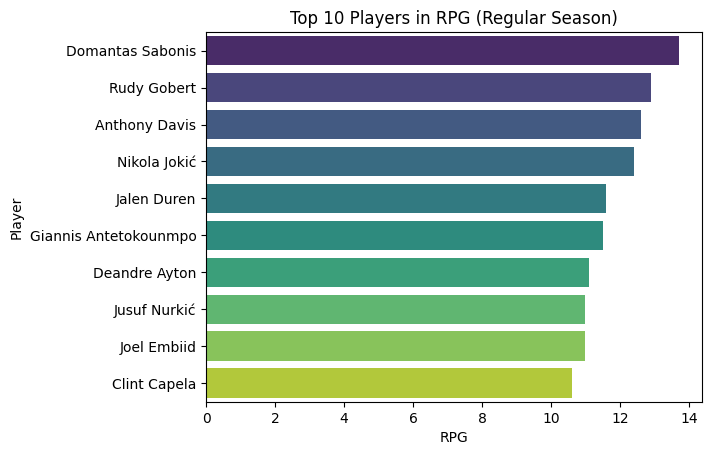

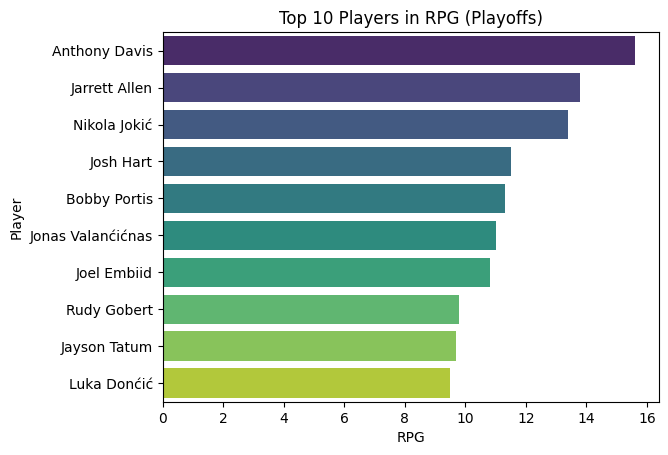

In [ ]:
top_10_regular_rpg = get_top_10(eda_regular_season_df, 'RPG', 'Regular Season')
top_10_playoffs_rpg = get_top_10(eda_playoffs_df, 'RPG', 'Playoffs')

plot_leaderboard(eda_regular_season_df, 'RPG', 'Regular Season')
plot_leaderboard(eda_playoffs_df, 'RPG', 'Playoffs')

####**In general, the top rebounders in both the Regular Season and Playoffs are predominantly Centers, reflecting the critical role of size and positioning near the basket.**

####**Most of the leaders in both categories are from this position, emphasizing that Centers have the advantage when it comes to securing rebounds due to their proximity to the rim.**

### Section 6: ASSISTS PER GAME (APG)


Top 10 Players in APG (Regular Season):
                Player   Tm Pos   APG
213  Tyrese Haliburton  IND  PG  10.9
12          Trae Young  ATL  PG  10.8
122        Luka Donćić  DAL  PG   9.8
143       Nikola Jokić  DEN   C   9.0
227       James Harden  LAC  PG   8.5
251       LeBron James  LAL  PF   8.3
475   Domantas Sabonis  SAC   C   8.2
282          Ja Morant  MEM  PG   8.1
205      Fred VanVleet  HOU  PG   8.1
79         LaMelo Ball  CHO  PG   8.0

Top 10 Players in APG (Playoffs):
                      Player   Tm Pos  APG
92              LeBron James  LAL  PF  8.8
53              Nikola Jokić  DEN   C  8.7
58         Tyrese Haliburton  IND  PG  8.2
38               Luka Donćić  DAL  PG  8.1
81              James Harden  LAC  PG  8.0
148            Jalen Brunson  NYK  PG  7.5
197             Tyrese Maxey  PHI  PG  6.8
125          Anthony Edwards  MIN  SG  6.5
164  Shai Gilgeous-Alexander  OKC  PG  6.4
5               Jayson Tatum  BOS  PF  6.3


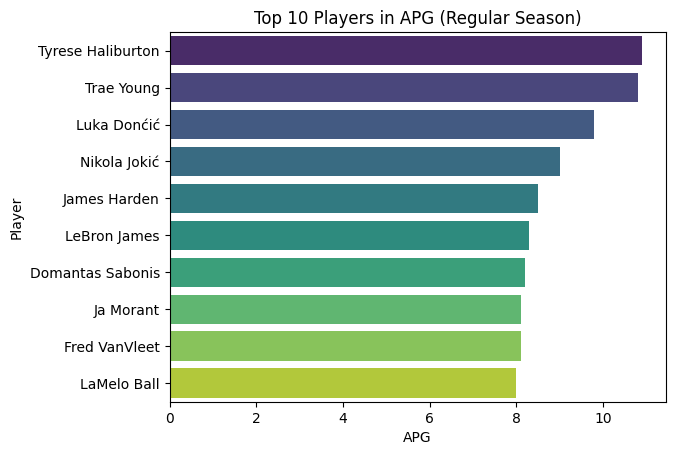

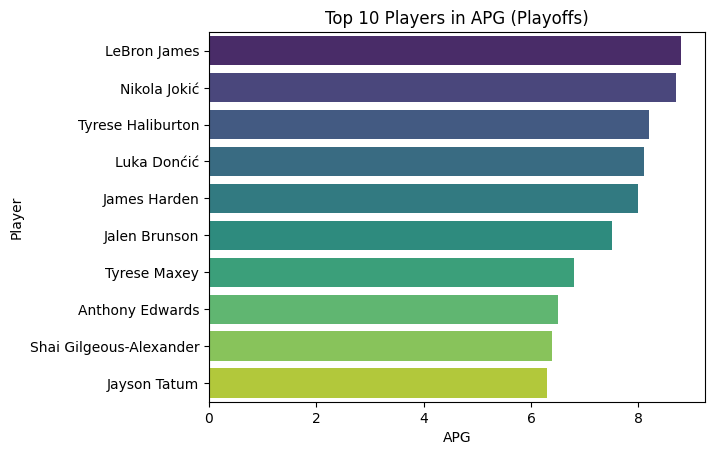

In [ ]:
top_10_regular_rpg = get_top_10(eda_regular_season_df, 'APG', 'Regular Season')
top_10_playoffs_apg = get_top_10(eda_playoffs_df, 'APG', 'Playoffs')

plot_leaderboard(eda_regular_season_df, 'APG', 'Regular Season')
plot_leaderboard(eda_playoffs_df, 'APG', 'Playoffs')

#### **In both the Regular Season and Playoffs, Point Guards (PGs) dominate the Assists Per Game (APG) category, as expected given their role on the court. Point guards are typically the primary facilitators and playmakers for their teams, responsible for setting up offensive plays, distributing the ball.**

#### **This is reflected in the top 10 rankings, where the majority of players are point guards, with several of them averaging over 8 assists per game during the regular season and Playoffs.**




Position Trends:
           PPG       RPG       APG
Pos                              
PG   9.600000  2.575229  3.520183
PF   8.764865  3.824324  1.658559
C    8.370408  5.587755  1.512245
SG   7.996947  2.335878  1.929008
SF   7.568293  3.013008  1.431707


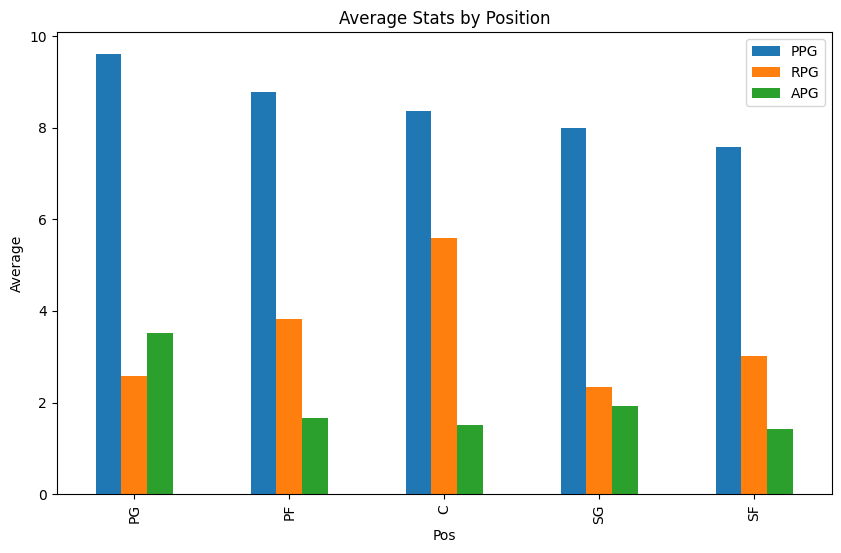

In [ ]:
# Average stats by position
position_trends = eda_regular_season_df.groupby('Pos')[['PPG', 'RPG', 'APG']].mean().sort_values(by='PPG', ascending=False)
print("\nPosition Trends:\n", position_trends)

# Visualization: Bar plot for stats by position
position_trends.plot(kind='bar', figsize=(10, 6))
plt.title('Average Stats by Position')
plt.ylabel('Average')
plt.show()


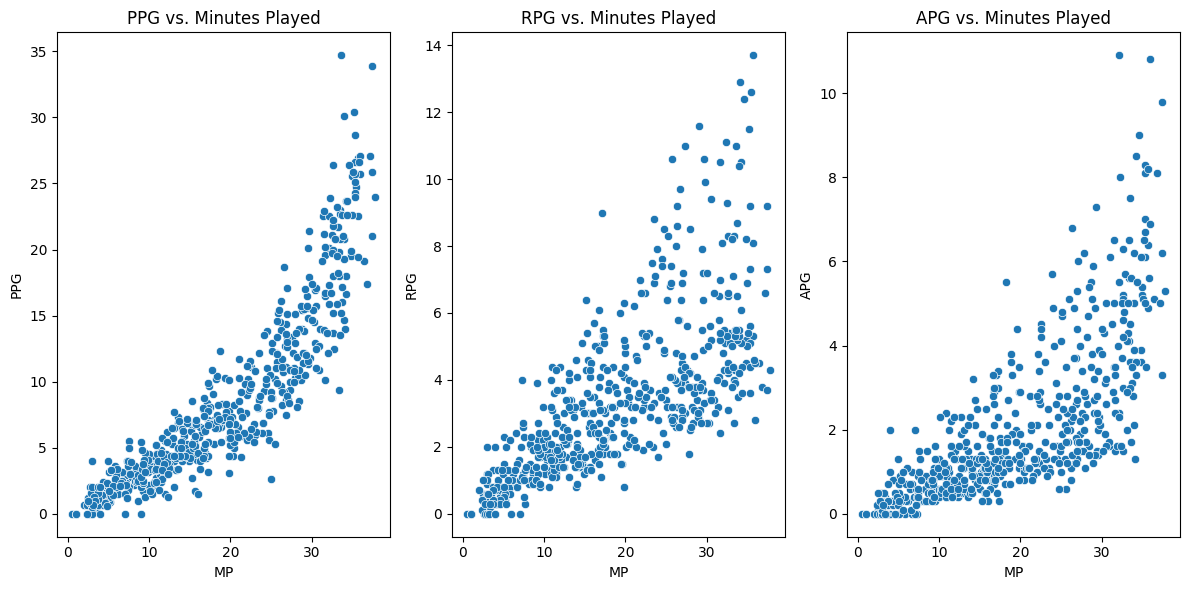

In [ ]:
# Scatter plots of stats vs. minutes played
plt.figure(figsize=(12, 6))
for i, stat in enumerate(['PPG', 'RPG', 'APG'], start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='MP', y=stat, data=eda_regular_season_df)
    plt.title(f'{stat} vs. Minutes Played')

plt.tight_layout()
plt.show()


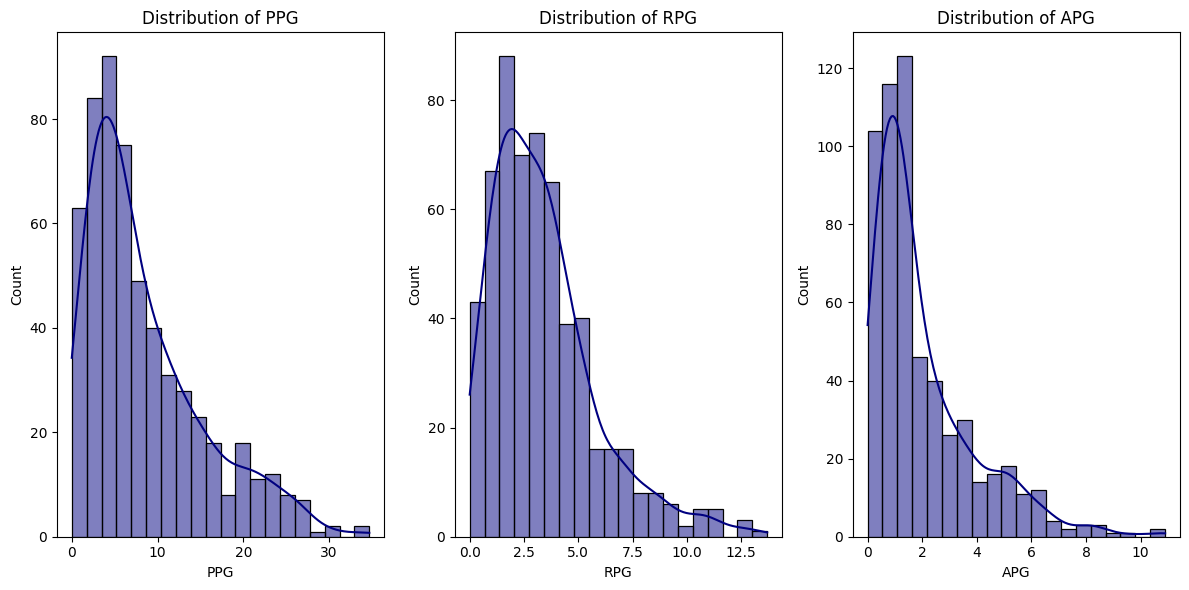

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
#Histogram with KDE:
#The bars in the histogram represent the number of players (frequency) who fall into specific ranges of PPG.
#The KDE (Kernel Density Estimation) overlay provides a smooth curve that approximates the probability density function, giving a continuous visualization of the data distribution.

plt.figure(figsize=(12, 6))
for i, stat in enumerate(['PPG', 'RPG', 'APG'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(eda_regular_season_df[stat], kde=True, color='navy', bins=20)
    plt.title(f'Distribution of {stat}')

plt.tight_layout()
plt.show()


## Advanced Basketball Statistics

In [ ]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html, Input, Output
import matplotlib.pyplot as plt
import plotly.graph_objects as go
NBA_Regular = cleaned_regular_season_df

### 1. True Shooting Percentage (TS%)
###     1) Show the summary statistics of TS%
###     2) Show the barplot of True Shooting Percentage
###      3) Is it normally distributed?
###      4) How was the dsitribution look like by each position?

In [ ]:
# 1) Calculate True Shooting Percentage (TS%) for all players
NBA_Regular['TS%'] = NBA_Regular['PTS'] / (
    2 * (NBA_Regular['FGA'] + 0.44 * NBA_Regular['FTA'])
)

NBA_Regular["TS%"].describe()


,TS%
count,568.000000
mean,0.548701
std,0.105049
min,0.000000
25%,0.515293
50%,0.564910
75%,0.604247
max,0.925000


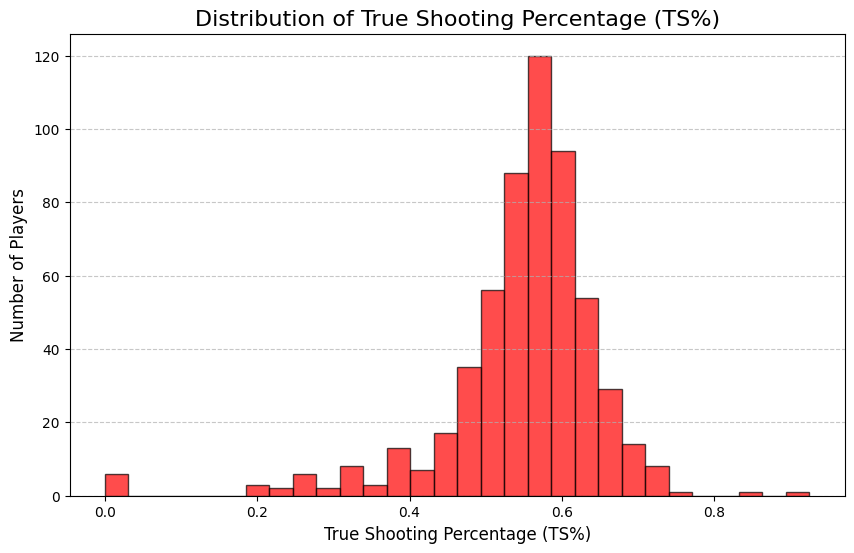

In [ ]:
#2) Plot the distribution of True Shooting Percentage (TS%)
plt.figure(figsize=(10, 6))
plt.hist(NBA_Regular['TS%'], bins=30, edgecolor='black', color = 'red', alpha=0.7)
plt.title('Distribution of True Shooting Percentage (TS%)', fontsize=16)
plt.xlabel('True Shooting Percentage (TS%)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

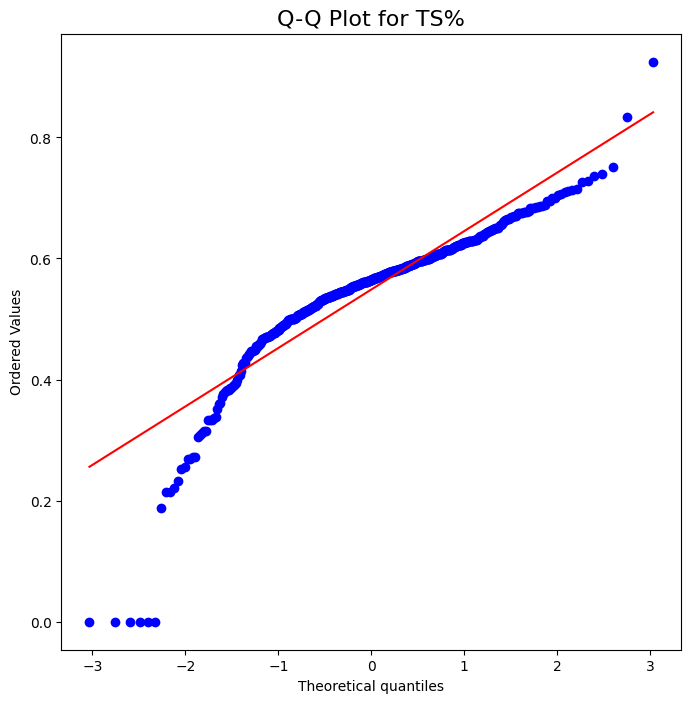

{'Shapiro-Wilk Test Statistic': 0.8422770058994737,
 'P-value': 2.5633323577034478e-23}

In [ ]:
# 3) QQ plot
import scipy.stats as stats
# Visual Inspection - Q-Q Plot
plt.figure(figsize=(8, 8))
stats.probplot(NBA_Regular['TS%'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for TS%', fontsize=16)
plt.show()

# Statistical Test - Shapiro-Wilk Test for Normality
shapiro_test_stat, shapiro_p_value = stats.shapiro(NBA_Regular['TS%'].dropna())

# Display results of Shapiro-Wilk Test
{"Shapiro-Wilk Test Statistic": shapiro_test_stat, "P-value": shapiro_p_value}

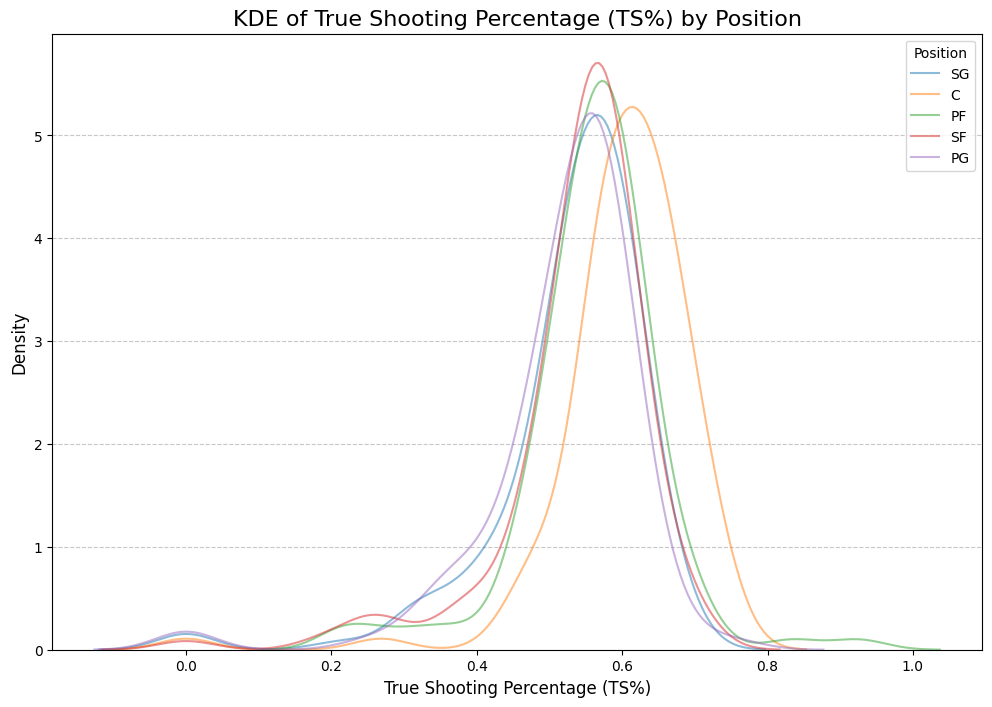

In [ ]:
# 4) Distribution of TS% by each position
import seaborn as sns

positions = NBA_Regular['Pos'].unique()
plt.figure(figsize=(12, 8))
for position in positions:
    subset = NBA_Regular[NBA_Regular['Pos'] == position]
    sns.kdeplot(subset['TS%'].dropna(), label=position, alpha=0.5)

plt.title('KDE of True Shooting Percentage (TS%) by Position', fontsize=16)
plt.xlabel('True Shooting Percentage (TS%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Position", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
NBA_Regular.groupby('Pos')['TS%'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,98.0,0.603804,0.094893,0.000000,0.567850,0.615458,0.657074,0.739247
PF,110.0,0.559862,0.095698,0.214592,0.525283,0.568397,0.606100,0.925000
PG,108.0,0.521343,0.107296,0.000000,0.489930,0.547373,0.579148,0.750751
SF,122.0,0.537764,0.101728,0.000000,0.515212,0.560193,0.595122,0.700000
SG,130.0,0.530712,0.106114,0.000000,0.506199,0.551969,0.595238,0.676353


In [ ]:
top_5_TS = NBA_Regular.sort_values(by='TS%', ascending=False)
top_5_TS.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
24,25,Drew Peterson,PF,24,BOS,3,0,7.7,1.3,2.0,...,0.0,0.3,0.3,0.3,0.7,0.0,0.3,0.3,3.7,0.925000
430,431,D.J. Wilson,PF,27,PHI,2,0,7.5,2.0,3.0,...,0.5,0.5,1.0,1.0,0.0,1.0,0.0,0.5,5.0,0.833333
483,484,Jordan Ford,PG,25,SAC,6,0,3.7,0.7,1.2,...,0.0,0.3,0.3,0.3,0.0,0.0,0.2,0.0,2.0,0.750751
502,503,Charles Bassey,C,23,SAS,19,0,10.8,1.5,2.1,...,1.2,2.8,4.0,1.1,0.4,0.9,0.8,1.6,3.3,0.739247
23,24,Luke Kornet,C,28,BOS,63,7,15.6,2.3,3.2,...,1.9,2.3,4.1,1.1,0.4,1.0,0.3,1.2,5.3,0.736930


Conclusion: Most of the players have TS% clustered around 0.5 and 0.65, and we have shapiro-walk test statistics of 0.84, p-value 2.56e-25, on 95% confidence inerval, we reject the null hypothesis that the distribution is normal.
As the graph shows, players in Center C have the highest average true shooting percentage, indicating they perform better in terms of scoring efficiency compared to other positions.

###2. Assists to Turnover Ratio
###      1) Show the summary statistics of AST/TO
###      2) Show the barplot of Assists to Turnover Ratio
###      3) How was the dsitribution look like by each position?

In [ ]:
# 1) Calculate Assist/Turnover Ratio
NBA_Regular['Assist/Turnover Ratio'] = (
    NBA_Regular['AST'] / NBA_Regular['TOV']
).replace([float('inf'), -float('inf')], 0).fillna(0)


In [ ]:
NBA_Regular['Assist/Turnover Ratio'].describe()

,Assist/Turnover Ratio
count,572.000000
mean,1.996159
std,1.268178
min,0.000000
25%,1.250000
50%,1.800000
75%,2.500000
max,10.500000


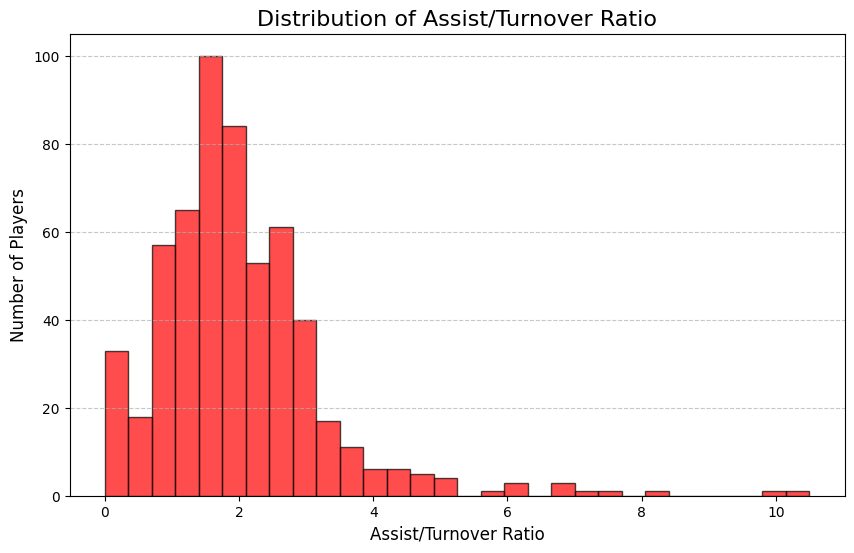

In [ ]:
# 2) Show the barplot of Assists to Turnover Ratio
plt.figure(figsize=(10, 6))
plt.hist(NBA_Regular['Assist/Turnover Ratio'], bins=30, edgecolor='black', color = 'red', alpha=0.7)
plt.title('Distribution of Assist/Turnover Ratio', fontsize=16)
plt.xlabel('Assist/Turnover Ratio', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

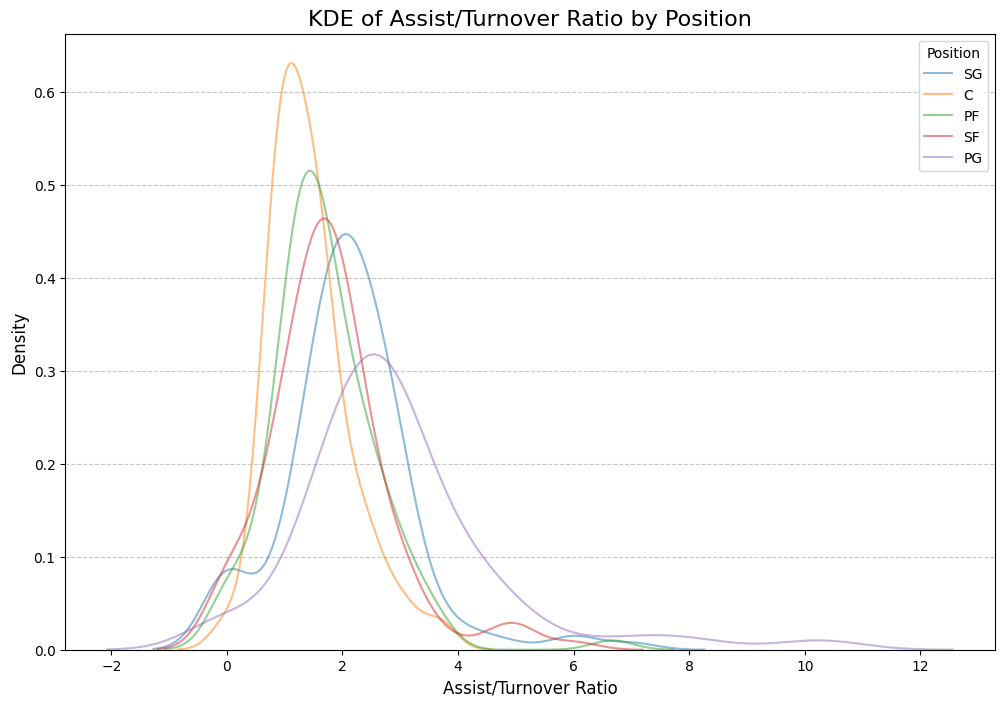

In [ ]:
# 3) Distribution of Assist/Turnover Ratio by each position
positions = NBA_Regular['Pos'].unique()
plt.figure(figsize=(12, 8))
for position in positions:
    subset = NBA_Regular[NBA_Regular['Pos'] == position]
    sns.kdeplot(subset['Assist/Turnover Ratio'].dropna(), label=position, alpha=0.5)

plt.title('KDE of Assist/Turnover Ratio by Position', fontsize=16)
plt.xlabel('Assist/Turnover Ratio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title="Position", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
top_5_TA = NBA_Regular.sort_values(by='Assist/Turnover Ratio', ascending=False)
top_5_TA.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,Assist/Turnover Ratio
332,333,Monte Morris,PG,28,MIN,33,0,14.4,1.9,4.6,...,1.5,1.7,2.1,0.6,0.3,0.2,0.4,5.0,0.513980,10.500000
533,534,Kobi Simmons,PG,26,TOR,4,0,16.8,2.3,5.3,...,1.5,1.8,3.0,1.5,0.5,0.3,1.3,5.0,0.471698,10.000000
304,305,Delon Wright,PG,31,MIA,47,1,15.8,1.6,4.0,...,1.4,1.8,2.5,1.1,0.2,0.3,0.7,4.5,0.506757,8.333333
552,553,Jason Preston,PG,24,UTA,7,0,10.1,0.9,2.7,...,1.6,2.4,2.3,0.3,0.1,0.3,0.4,1.7,0.314815,7.666667
563,564,Tyus Jones,PG,27,WAS,66,66,29.3,4.9,10.1,...,2.4,2.7,7.3,1.1,0.3,1.0,0.7,12.0,0.578927,7.300000


## **Impact Plus**


Impact Plus is a comprehensive and concise metric designed to evaluate a player’s overall contribution by comparing their performance to the league average. It combines multiple performance dimensions, weighted according to their relative importance, into a single score for easy interpretation.

The formula for Impact Plus is:

Impact Plus = (0.4 * eFG%) + (0.3 * Playmaking Score) + (0.2 * TRB) + (0.1 * Defence Score)

1) Nomalize the score to 100

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rg_df = cleaned_regular_season_df

#Impact Plus=(0.4*eFG%)+(0.3*PM Score)+(0.2*TRB)+(0.1*DF Score)
threshold_games = rg_df["G"].median()
if 'G' in rg_df.columns:  # Ensure 'GP' (Games Played) column exists
    rg_df = rg_df[rg_df['G'] >= threshold_games]
    print(f"Filtered DataFrame with players having >= {threshold_games} games:")
    print(rg_df)
else:
    print("The 'G' column (Games Played) is not found in the dataset.")
    rg_df # If no GP column, use the original DataFrame

### Scoring Efficiency
R_avg_eFGP = rg_df["eFG%"].mean()
print(f"Average of eFG% is: {R_avg_eFGP}\n")

### Playmaking Score = (AST*0.7) + (TOV*0.3)

# AST
avg_AST = rg_df["AST"].mean()
print(f"AST07 is: {avg_AST}")
# TOV
avg_TOV = rg_df["TOV"].mean()
print(f"TOV03 is: {avg_TOV}")

R_PMS = (0.7 * avg_AST) + (0.3 * avg_TOV)
print(f"Regular Season League Average Playmaking Score is:{R_PMS:.2f}\n")

### Defensive Score = (0.4*STL)+(0.4*BLK)+(0.2*PF)

# STL
avg_STL = rg_df["STL"].mean()
print(f"avg STL is: {avg_STL}")
# BLK
avg_BLK = rg_df["BLK"].mean()
print(f"avg BLK is: {avg_BLK}")
# PF
avg_PF = rg_df["PF"].mean()
print(f"avg PF is: {avg_PF}")

R_DS = (0.4 * avg_STL) + (0.4 * avg_BLK) + (0.2 * avg_PF)
print(f"Regular Season League Average Defensive Score is:{R_DS:.2f}\n")

### TRB
R_avg_TRB = rg_df["TRB"].mean()
print(f"avg TRB is: {R_avg_TRB}\n")

### Impact Plus=(0.4*eFG%)+(0.3*PM Score)+(0.2*TRB)+(0.1*DF Score)
R_IP = (0.4*R_avg_eFGP)+(0.3*R_PMS)+(0.2*R_avg_TRB)+(0.1*R_DS)
print(f"Regular Season Impact Plus is:{R_IP:.2f}\n")

# Normalize Impact Plus to set league average at 100
scaling_factor = 100 / R_IP
normalized_league_avg_IP = R_IP * scaling_factor
print(f"Scaling Factor: {scaling_factor:.2f}")
print(f"Normalized League Average Impact Plus is: {normalized_league_avg_IP:.2f}")

Filtered DataFrame with players having >= 51.0 games:
      Rk            Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  DRB  \
5      6  Garrison Mathews  SG   27  ATL  66   5  15.0  1.6   3.4  ...  1.1   
6      7   Dejounte Murray  SG   27  ATL  78  78  35.7  8.6  18.8  ...  4.5   
7      8    Onyeka Okongwu   C   23  ATL  55   8  25.5  4.1   6.6  ...  4.2   
8      9   De'Andre Hunter  SF   26  ATL  57  37  29.5  5.3  11.6  ...  3.4   
10    11      Clint Capela   C   29  ATL  73  73  25.8  4.8   8.5  ...  6.0   
..   ...               ...  ..  ...  ...  ..  ..   ...  ...   ...  ...  ...   
559  560      Jordan Poole  SG   24  WAS  78  66  30.1  6.3  15.2  ...  2.3   
560  561     Corey Kispert  SF   24  WAS  80  22  25.8  4.8   9.9  ...  2.4   
561  562   Bilal Coulibaly  SF   19  WAS  63  15  27.2  3.0   6.9  ...  3.2   
563  564        Tyus Jones  PG   27  WAS  66  66  29.3  4.9  10.1  ...  2.4   
569  570       Deni Avdija  SF   23  WAS  75  75  30.1  5.4  10.7  ...  6.1  

2) Identify top 5 and bottom 5 players

In [ ]:
### Identify top 5 and bottom 5 players
# Function to calculate Impact Plus for a player
def calculate_impact_plus(row):
    PM = (0.7 * row["AST"]) + (0.3 * row["TOV"])
    DS = (0.4 * row["STL"]) + (0.4 * row["BLK"]) + (0.2 * row["PF"])
    IP_raw = (0.4 * row["eFG%"]) + (0.3 * PM) + (0.2 * row["TRB"]) + (0.1 * DS)
    return IP_raw * scaling_factor

# Apply the function to all players
rg_df["Impact Plus"] = rg_df.apply(calculate_impact_plus, axis=1)

# Sort players by Impact Plus
rg_df_sorted = rg_df.sort_values(by="Impact Plus", ascending=False)

# Top 5 players
top_5 = rg_df_sorted.head(5)
print("Top 5 Players by Impact Plus:")
print(top_5[["Player", "Impact Plus"]])

# Bottom 5 players
bottom_5 = rg_df_sorted.tail(5)
print("\nBottom 5 Players by Impact Plus:")
print(bottom_5[["Player", "Impact Plus"]])


Top 5 Players by Impact Plus:
                    Player  Impact Plus
475       Domantas Sabonis   266.628832
143           Nikola Jokić   261.642489
122            Luka Donćić   239.698414
320  Giannis Antetokounmpo   227.487599
259          Anthony Davis   200.744559

Bottom 5 Players by Impact Plus:
              Player  Impact Plus
57      Jevon Carter    37.454829
218   Doug McDermott    37.402780
410    Caleb Houstan    35.039732
308       A.J. Green    31.885531
480  Kessler Edwards    24.400811


<ipython-input-30-4484b4e9a53e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rg_df["Impact Plus"] = rg_df.apply(calculate_impact_plus, axis=1)


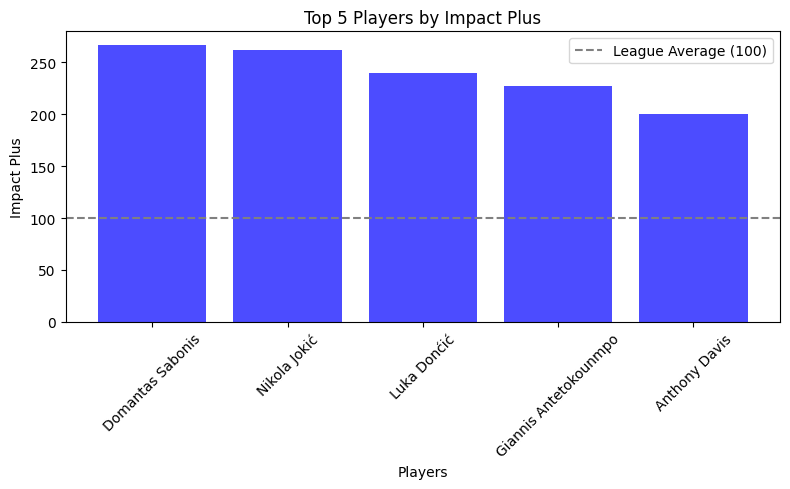

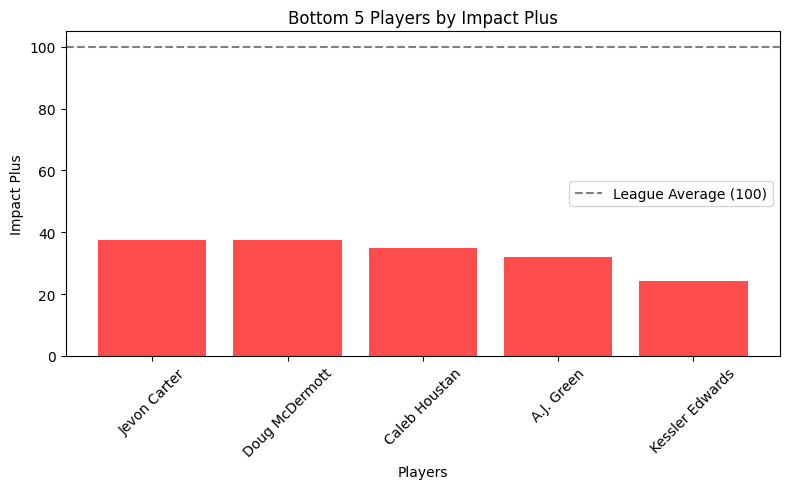

In [ ]:
### Create a plot for top and bottom players

# --- Plotting Top 5 Players ---
plt.figure(figsize=(8, 5))
plt.bar(top_5["Player"], top_5["Impact Plus"], color="blue", alpha=0.7)
plt.axhline(y=100, color="gray", linestyle="--", label="League Average (100)")  # Add baseline
plt.title("Top 5 Players by Impact Plus")
plt.ylabel("Impact Plus")
plt.xlabel("Players")
plt.xticks(rotation=45)  # Rotate player names for readability
plt.legend()
plt.tight_layout()
plt.show()

# --- Plotting Bottom 5 Players ---
plt.figure(figsize=(8, 5))
plt.bar(bottom_5["Player"], bottom_5["Impact Plus"], color="red", alpha=0.7)
plt.axhline(y=100, color="gray", linestyle="--", label="League Average (100)")  # Add baseline
plt.title("Bottom 5 Players by Impact Plus")
plt.ylabel("Impact Plus")
plt.xlabel("Players")
plt.xticks(rotation=45)  # Rotate player names for readability
plt.legend()
plt.tight_layout()
plt.show()

3) Look up individual player's score

In [ ]:
### Example for Player A

# Set the player names as the index
if 'Player' in rg_df.columns:
    rg_df = rg_df.set_index('Player')

# Example: Extract stats for a specific player
Sample = "Shai Gilgeous-Alexander"  # Replace with the desired player's name
if Sample in rg_df.index:
    Sample_stat = rg_df.loc[Sample]
    print(f"Stats for {Sample}:\n{Sample_stat}")
else:
    print(f"Player '{Sample}' not found in the dataset.")

# Calculate Player A's raw Impact Plus
Sample_PM = (0.7 * Sample_stat["AST"]) + (0.3 * Sample_stat["TOV"])
Sample_DS = (0.4 * Sample_stat["STL"]) + (0.4 * Sample_stat["BLK"]) + (0.2 * Sample_stat["PF"])

Sample_IP_raw = (
    (0.4 * Sample_stat["eFG%"]) +
    (0.3 * Sample_PM) +
    (0.2 * Sample_stat["TRB"]) +
    (0.1 * Sample_DS)
)

# Normalize Player A's Impact Plus
Sample_IP = Sample_IP_raw * scaling_factor
print(f"{Sample}'s Impact Plus (normalized) is: {Sample_IP:.2f}")

# Calculate difference in percentage and times better
percent_difference = ((Sample_IP - normalized_league_avg_IP) / normalized_league_avg_IP) * 100
times_better = Sample_IP / normalized_league_avg_IP

# Interpretation: How much better/worse Player A is than the league average
if Sample_IP < normalized_league_avg_IP:
    print(f"{Sample} is {abs(percent_difference):.2f}% lower than the league average.")
elif Sample_IP > normalized_league_avg_IP:
    print(f"{Sample} is {percent_difference:.2f}% higher than the league average.")
    print(f"{Sample} is performing at {times_better:.2f} times the league average.")
else:
    print(f"{Sample} is performing at the league average.")


Stats for Shai Gilgeous-Alexander:
Rk                              387
Pos                              PG
Age                              25
Tm                              OKC
G                                75
GS                               75
MP                             34.0
FG                             10.6
FGA                            19.8
FG%                           0.535
3P                              1.3
3PA                             3.6
3P%                           0.353
2P                              9.3
2PA                            16.2
2P%                           0.576
eFG%                          0.567
FT                              7.6
FTA                             8.7
FT%                           0.874
ORB                             0.9
DRB                             4.7
TRB                             5.5
AST                             6.2
STL                             2.0
BLK                             0.9
TOV                          

## Player Performance Analysis Radar Diagram


In [ ]:
nba_stats = NBA_Regular

In [ ]:
complete_column_mapping = {
    "G": "Games Played",
    "GS": "Games Started",
    "MP": "Minutes Played Per Game",
    "FG": "Field Goals Made Per Game",
    "FGA": "Field Goal Attempts Per Game",
    "FG%": "Field Goal Percentage",
    "3P": "3-Point Field Goals Per Game",
    "3PA": "3-Point Field Goal Attempts Per Game",
    "3P%": "3-Point Field Goal Percentage",
    "2P": "2-Point Field Goals Per Game",
    "2PA": "2-Point Field Goal Attempts Per Game",
    "2P%": "2-Point Field Goal Percentage",
    "eFG%": "Effective Field Goal Percentage",
    "FT": "Free Throws Made Per Game",
    "FTA": "Free Throw Attempts Per Game",
    "FT%": "Free Throw Percentage",
    "ORB": "Offensive Rebounds Per Game",
    "DRB": "Defensive Rebounds Per Game",
    "TRB": "Total Rebounds Per Game",
    "AST": "Assists Per Game",
    "STL": "Steals Per Game",
    "BLK": "Blocks Per Game",
    "TOV": "Turnovers Per Game",
    "PF": "Personal Fouls Per Game",
    "PTS": "Points Per Game",
    "TS%": "True Shooting Percentage",
    "PPS": "Points Per Shot",
    "3PAr": "3-Point Attempt Rate",
    "PER": "Player Efficiency Rating",
    "USG%": "Usage Percentage",
    "Points_Produced": "Total Points Produced",
    "Possessions_Used": "Total Possessions Used",
    "ORtg": "Offensive Rating"
}


nba_stats.rename(columns=complete_column_mapping, inplace=True)

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
# Initialize Dash app
app = dash.Dash(__name__)
stat_columns = [
    "True Shooting Percentage",
    "Total Rebounds Per Game",
    "Points Per Game",
    "Assists Per Game",
    'Assist/Turnover Ratio',
    "Blocks Per Game",
    "Steals Per Game"
]
# App layout
app.layout = html.Div([
    html.H1("NBA Player Performance Radar Diagram", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Position:"),
        dcc.Dropdown(
            id = 'position-dropdown',
            options = [{'label': pos, 'value': pos} for pos in nba_stats['Pos'].unique()],
            value = nba_stats['Pos'].unique()[0],
            clearable = False
        ),
    ], style = {'width': '30%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Player:"),
        dcc.Dropdown(
            id = 'player-dropdown',
            clearable = False
        ),
    ], style = {'width': '30%', 'display': 'inline-block'}),

    html.Div([
        html.Label("Select Stats:"),
        dcc.Checklist(
            id = 'stat-checklist',
            options = [{'label': stat, 'value': stat} for stat in stat_columns],
            value = ["True Shooting Percentage",
                     "Total Rebounds Per Game",
                    "Points Per Game",
                    "Assists Per Game",
                    'Assist/Turnover Ratio',
                    "Blocks Per Game",
                    "Steals Per Game"
                    ],  # Default stats
            inline = False
        ),
    ], style = {'width': '100%', 'padding': '10px'}),

    dcc.Graph(id = 'spider-chart')
])

# Callback to update player dropdown based on position
@app.callback(
    Output('player-dropdown', 'options'),
    Output('player-dropdown', 'value'),
    Input('position-dropdown', 'value')
)
def update_player_dropdown(selected_position):
    players = nba_stats[nba_stats['Pos'] == selected_position]['Player'].unique()
    return [{'label': player, 'value': player} for player in players], players[0]

# Callback to generate octagonal spider chart
@app.callback(
    Output('spider-chart', 'figure'),
    Input('position-dropdown', 'value'),
    Input('player-dropdown', 'value'),
    Input('stat-checklist', 'value')
)
def update_spider_chart(position, player_name, selected_stats):
    # Filter dataset by position
    position_data = nba_stats[nba_stats['Pos'] == position]

    # Normalize stats for the group (min-max normalization)
    normalized_data = position_data.copy()
    for stat in selected_stats:
            max_val, min_val = position_data[stat].max(), position_data[stat].min()
            normalized_data[stat] = (position_data[stat] - min_val) / (max_val - min_val)
    # Player stats
    player_data = normalized_data[normalized_data['Player'] == player_name].iloc[0]

    # Group averages
    group_avg = normalized_data[selected_stats].mean()

    # Create spider chart
    fig = go.Figure()

    # Add player's stats
    fig.add_trace(go.Scatterpolar(
        r=[player_data[stat] for stat in selected_stats],
        theta=selected_stats,
        fill='toself',
        name=player_name
    ))

    # Add group average stats
    fig.add_trace(go.Scatterpolar(
        r=group_avg.values,
        theta=selected_stats,
        fill='toself',
        name=f"{position} Average"
    ))

    # Update layout for octagon shape
    fig.update_layout(
        polar=dict(
            gridshape='linear',  # Makes the grid polygonal
            angularaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black'
            ),
            radialaxis=dict(
                visible=True,
                range=[0, 1],
                showline=True,
                gridcolor='lightgrey'
            )
        ),
        showlegend=True,
        title=f"Performance Comparison: {player_name} vs {position} Average"
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>